## Iterate and Evaluate Your Classifier

** Jackie Zuker **

It's time to revisit your classifier from the previous assignment. Using the evaluation techniques we've covered here, look at your classifier's performance in more detail. Then go back and iterate. Repeat this process until you have five different versions of your classifier. Once you've iterated, answer these questions to compare the performance of each:

* Do any of your classifiers seem to overfit?
* Which seem to perform the best? Why?
* What features seemed to be most impactful to performance?

Write up your iterations and answers to the above questions in a few pages. Submit a link below and go over it with your mentor to see if they have any other ideas on how you could improve your classifier's performance.

Five versions of my classifier: 
1. Bernoulli NB cross-validation 10-folds
2. Gaussian Naive Bayes (10-folds)
3. Multinomial Naive Bayes
4. Decision Tree
5. KNN Cross-validation

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import scipy
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cross_validation import cross_val_score


/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
# Grab and process the raw data.
data_path = ("/Users/jacquelynzuker/Desktop/sentiment labelled sentences/amazon_cells_labelled.txt"
            )
amazon_raw = pd.read_csv(data_path, delimiter= '\t', header=None)
amazon_raw.columns = ['message', 'satisfaction']

In [3]:
keywords = ['must have', 'excellent', 'awesome', 'recommend', 'good', 
            'great', 'happy', 'love', 'satisfied', 'best', 'works', 
            'liked', 'easy', 'quick', 'incredible', 'perfectly',
           'right', 'cool', 'joy', 'easier', 'fast', 'nice', 'family',
           'incredible', 'sweetest', 'poor', 'broke', 'doesn\'t work', 
            'not work', 'died', 'don\'t buy', 'problem', 'useless', 
            'awful', 'failed', 'terrible', 'horrible', '10',
           'cool']

for key in keywords:
    # Note that we add spaces around the key so that we're getting the word,
    # not just pattern matching.
    amazon_raw[str(key)] = amazon_raw.message.str.contains(
        '' + str(key) + '',
        case = False
    )
    
    

In [4]:
data = amazon_raw[keywords]
target = amazon_raw['satisfaction']

## 1. Bernoulli Naive Bayes (Cross-Validation 10-folds)

In [5]:
# Instantiate our model and store it in a new variable.
bnb = BernoulliNB()
scores = cross_val_score(bnb, data, target, cv = 10, scoring="accuracy")

print("Percent accuracy within each fold:\n")
print(scores)
print("\nMean accuracy:\n")
print(scores.mean())


Percent accuracy within each fold:

[ 0.81  0.78  0.83  0.77  0.8   0.72  0.69  0.77  0.8   0.76]

Mean accuracy:

0.773


In [6]:
# Create a dataFrame to compare performance of Classifier Models
classifiers_compare = pd.DataFrame()
classifiers_compare = classifiers_compare.append([["BernoulliNB", (scores.mean())]])

## 2. Gaussian Naive Bayes


In [7]:
gnb = GaussianNB()
scores = cross_val_score(gnb, data, target, cv = 10, scoring="accuracy")

print("Percent accuracy within each fold:\n")
print(scores)
print("\nMean accuracy:\n")
print(scores.mean())

classifiers_compare = classifiers_compare.append([["GaussianNB", (scores.mean())]])

Percent accuracy within each fold:

[ 0.78  0.76  0.76  0.74  0.79  0.66  0.57  0.77  0.8   0.78]

Mean accuracy:

0.741


## 3. Multinomial Naive Bayes

In [8]:
mnb = MultinomialNB()

scores = cross_val_score(mnb, data, target, cv = 10, scoring="accuracy")

print("Percent accuracy within each fold:\n")
print(scores)
print("\nMean accuracy:\n")
print(scores.mean())

classifiers_compare = classifiers_compare.append([["MultinomialNB", (scores.mean())]])

Percent accuracy within each fold:

[ 0.81  0.78  0.82  0.77  0.8   0.71  0.71  0.76  0.79  0.72]

Mean accuracy:

0.767


## 4. Decision Tree Classifier

In [9]:
dtc = DecisionTreeClassifier(max_depth=5)
scores = cross_val_score(dtc, data, target, cv = 10, scoring="accuracy")
scores

print("Percent accuracy within each fold:\n")
print(scores)
print("\nMean accuracy:\n")
print(scores.mean())

classifiers_compare = classifiers_compare.append([["DecisionTree", (scores.mean())]])

Percent accuracy within each fold:

[ 0.74  0.74  0.75  0.75  0.67  0.68  0.64  0.64  0.73  0.62]

Mean accuracy:

0.696


## 5. K-Nearest Neighbors 

In [10]:
# search for an optimal value of K for KNN
k_range = range(1,30)
k_scores = []
for k in k_range: 
    knn = KNeighborsClassifier(n_neighbors = k)
    scores = cross_val_score(knn, data, target, cv = 10, 
                             scoring="accuracy")
    k_scores.append(scores.mean())
print(k_scores)

[0.61499999999999999, 0.61099999999999999, 0.64100000000000001, 0.76000000000000001, 0.76200000000000001, 0.73699999999999988, 0.748, 0.747, 0.75500000000000012, 0.75400000000000011, 0.75500000000000012, 0.754, 0.73399999999999999, 0.75, 0.72900000000000009, 0.74399999999999999, 0.72300000000000009, 0.74600000000000011, 0.72399999999999998, 0.74099999999999999, 0.71599999999999997, 0.72199999999999986, 0.72000000000000008, 0.73999999999999999, 0.71699999999999997, 0.73999999999999999, 0.73199999999999998, 0.74099999999999999, 0.7390000000000001]


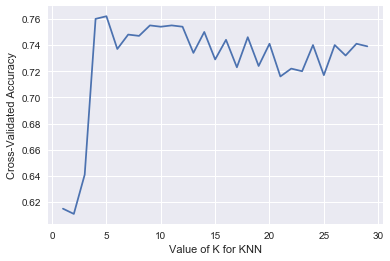

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline

# plot the value of K for KNN (x-axis) versus the cross-validated accuracy (y-axis)
plt.plot(k_range, k_scores)
plt.xlabel("Value of K for KNN")
plt.ylabel("Cross-Validated Accuracy")

Looks like k=5 is the optimal k-value for this dataset. 

In [12]:
knn = KNeighborsClassifier(n_neighbors=5)

scores = cross_val_score(knn, data, target, cv = 10, scoring = "accuracy")

print("Percent accuracy within each fold:\n")
print(scores)
print("\nMean accuracy:\n")
print(scores.mean())

classifiers_compare = classifiers_compare.append([["KNN", (scores.mean())]])


Percent accuracy within each fold:

[ 0.8   0.79  0.83  0.76  0.74  0.68  0.71  0.77  0.78  0.76]

Mean accuracy:

0.762


In [13]:
classifiers_compare

,0,1
0,BernoulliNB,0.773
0,GaussianNB,0.741
0,MultinomialNB,0.767
0,DecisionTree,0.696
0,KNN,0.762


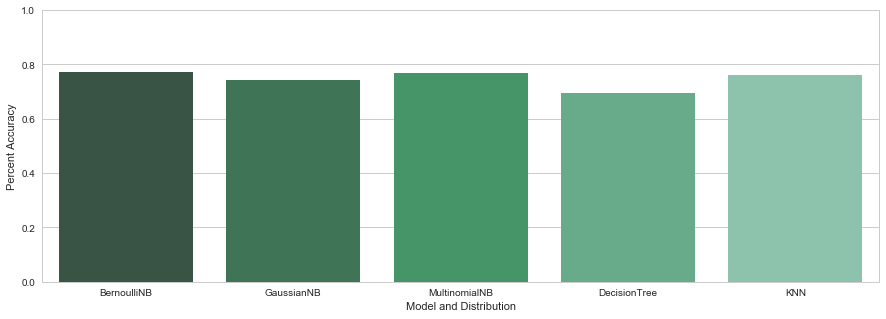

In [14]:
plt.figure(figsize=(15,5))
sns.set(style="whitegrid")
sns.barplot(x=0, y=1, data=classifiers_compare, palette="BuGn_d")
plt.xlabel("Model and Distribution")
plt.ylim(0,1)
plt.ylabel("Percent Accuracy")
plt.show()



## Do any of your classifiers seem to overfit?

None of these classifiers seem to overfit. 10-fold cross validation was used in all cases, and the highest rate of accuracy was 77.3% on this run.     

## Which seem to perform the best? Why?

The Bernoulli Naive Bayes model returned the best accuracy when cross-validation was used. This is because the Bernoulli distribution is well suited to cases with two possible outcomes. 


## What features seemed to be most impactful to performance?

The model used had a large impact on performance. Specific keywords are also likely to be impactful to performance. Let's look at the difference in accuracy when we remove the five most-common keywords from the model. 

In [15]:
# Create a new Data Frame with the value counts for each key
mydf = pd.DataFrame(data.sum())
mydf.reset_index(inplace=True)
mydf.columns = ["key", "valueCounts"]

# Return the 5 most common keys found in the review set
myTopVals = sorted(list(mydf["valueCounts"]))[-5]
myTopVals

# Remove keys with more than threshold value of valuecounts.  
newKeys = mydf[mydf.valueCounts < myTopVals].key
newKeys = list(newKeys)

In [16]:
data = amazon_raw[newKeys]    
target = amazon_raw['satisfaction']
scores = cross_val_score(bnb, data, target, cv = 10, scoring="accuracy")

print("Percent accuracy within each fold:\n")
print(scores)
print("\nMean accuracy:\n")
print(scores.mean())

Percent accuracy within each fold:

[ 0.62  0.62  0.64  0.58  0.65  0.58  0.58  0.64  0.61  0.7 ]

Mean accuracy:

0.622


By removing the top 5 keys from the Bernoulli Naive Bayes mode, there was a change in overall accuracy from 77.3% to 62.2%. The choice of which keys to include in the model have a large impact on the overall accuracy of the model. 